# Plotting with Matplotlib
IPython works with the [Matplotlib](http://matplotlib.org/) plotting library, which integrates Matplotlib with IPython's display system and event loop handling.

In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

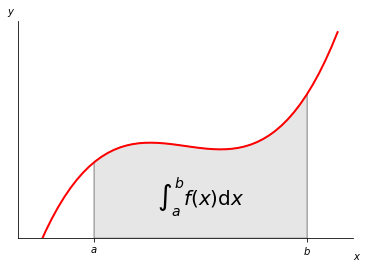

In [12]:
# %load http://matplotlib.org/mpl_examples/showcase/integral_demo.py
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9 # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()

In [7]:
import pandas as pd

df1 = pd.DataFrame({'HPI': [80,85,88,85],
                    'Int_rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,65,55]}, 
                   index = [2001, 2002, 2003, 2004])
df2 = pd.DataFrame({'HPI': [80,85,88,85],
                    'Int_rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,65,55]}, 
                   index = [2005, 2006, 2007, 2008])
df3 = pd.DataFrame({'HPI': [80,85,88,85],
                    'Unemployment':[7,8,9,6],
                    'Low_tier_HPI':[50,52,50,53]}, 
                   index = [2001, 2002, 2003, 2004])

print(pd.merge(df1,df2, on='HPI'))
df1.set_index('HPI', inplace=True) #share index but no columns
df3.set_index('HPI', inplace=True)

joined = df1.join(df3)
print(joined)

df1 = pd.DataFrame({'Year': [2001, 2002, 2003, 2004],
                    'Int_rate':[2,3,2,2],
                    'US_GDP_Thousands':[50,55,65,55]})
df3 = pd.DataFrame({'Year': [2001, 2003, 2004, 2005],
                    'Unemployment':[7,8,9,6],
                    'Low_tier_HPI':[50,52,50,53]})

merged = pd.merge(df1, df3, on = 'Year', how='left')
merged.set_index('Year', inplace = True)
print(merged)
merged = pd.merge(df1, df3, on = 'Year', how='right')
merged.set_index('Year', inplace = True)
print(merged)
merged = pd.merge(df1, df3, on = 'Year', how='outer')
merged.set_index('Year', inplace = True)
print(merged)
#left, right, outer and inner are the join types
#default is inner

   HPI  Int_rate_x  US_GDP_Thousands_x  Int_rate_y  US_GDP_Thousands_y
0   80           2                  50           2                  50
1   85           3                  55           3                  55
2   85           3                  55           2                  55
3   85           2                  55           3                  55
4   85           2                  55           2                  55
5   88           2                  65           2                  65
     Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9
      Int_rate  US_GDP_

In [15]:
import pandas as pd
PUF_Y2016 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2016.csv', index_col=0)
PUF_Y2016
#one way to set the column index as used here, index_col=0
#432 rows x 163 columns

,ACO_Name,ACO_State,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Initial_Track_1,Initial_Track_2,Initial_Track_3,Current_Start_Date,Current_Track_1,...,ACO21,ACO42,ACO40,DM_Comp,ACO27,ACO41,ACO28,ACO30,ACO31,ACO33
ACO_Num,,,,,,,,,,,,,,,,,,,,,
A67373,"Palm Beach Accountable Care Organization, LLC",Florida,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,98.56,91.52,8.33,74.9,10.65,80.99,84.92,90.94,100,95.81
A38665,CCACO,"New York, New Jersey",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,96.24,73.67,0,38.43,11.29,41.89,77.43,81.82,97.03,77.61
A76261,Hackensack Alliance ACO,"New Jersey, New York",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,84.21,86.86,3.85,41.94,12.5,43.55,71.77,85.08,82.45,87.96
A38596,NH Accountable Care Partners,"New Hampshire, Maine, Massachusetts",Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,70.59,86.32,2.94,62.5,9.27,68.15,73.78,91.89,87.01,80.61
A60892,"Arizona Connected Care, LLC",Arizona,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,67.77,70.39,3.13,31.09,25.27,37.09,69,81.37,79.31,65.91
A58483,Atlantic ACO,"New Jersey, Pennsylvania",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,82.85,75.89,0,39.3,17.04,45.57,70.33,78.5,89.24,79.27
A61599,"Florida Physicians Trust, LLC",Florida,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,77.1,84.89,0,51.25,9.52,53.92,80.16,82,96.97,93.94
A46707,"Premier ACO Physicians Network, LLC",California,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,71.89,58.25,0,11.65,44.18,15.26,61.45,61.03,79.17,83.66
A28708,"Advocate Physician Partners Accountable Care, ...",Illinois,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,83.15,81.44,9.09,49.49,12.5,53.72,75.7,84.59,78.57,82.35


In [11]:
PUF_Y2015 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2015.csv')
PUF_Y2015 = PUF_Y2015.set_index('ACO_Num')
#another way to set the index if don't know the column number reference
PUF_Y2015
#392 rows x 118 columns

,ACO_Name,ACO_State,Start_Date,Track1,Track2,Adv_Pay,N_AB,Sav_rate,MinSavPerc,BnchmkMinExp,...,N_CAH,N_FQHC,N_RHC,N_ETA,N_Fac_Other,N_PCP,N_Spec,N_NP,N_PA,N_CNS
ACO_Num,,,,,,,,,,,,,,,,,,,,,
A67373,"Palm Beach Accountable Care Organization, LLC",Florida,7/1/2012,1,0,0,"60,845",9.48%,2.00%,"76,642,477",...,0,0,0,0,0,219,278,63,0,0
A38665,CCACO,"New Jersey, New York",4/1/2012,1,0,0,"9,420",11.02%,3.06%,"10,317,715",...,0,0,0,0,0,91,175,21,0,0
A76261,Hackensack Alliance ACO,"New Jersey, New York",4/1/2012,1,0,0,"23,156",10.96%,2.47%,"33,353,310",...,0,0,0,0,6,132,426,94,5,1
A39692,"Primary Partners, LLC",Florida,4/1/2012,1,0,1,"6,965",6.59%,3.41%,"4,347,600",...,0,0,0,0,0,22,0,2,0,0
A38596,NH Accountable Care Partners,"Maine, Massachusetts, New Hampshire",7/1/2012,1,0,0,"38,700",-0.08%,2.31%,"-323,268",...,0,0,0,0,6,303,292,157,0,0
A60892,"Arizona Connected Care, LLC",Arizona,4/1/2012,1,0,0,"6,956",8.34%,3.41%,"4,858,147",...,0,39,0,0,0,153,87,112,0,0
A58483,Atlantic ACO,"New Jersey, Pennsylvania",4/1/2012,1,0,0,"86,189",3.85%,2.00%,"35,513,990",...,0,6,0,0,8,466,887,166,9,4
A61599,"Florida Physicians Trust, LLC",Florida,4/1/2012,1,0,0,"6,544",12.21%,3.49%,"9,112,343",...,0,0,0,0,0,26,10,9,0,0
A46707,"Premier ACO Physicians Network, LLC",California,4/1/2012,1,0,0,"8,835",-2.25%,3.12%,"-2,606,456",...,0,0,0,0,0,125,98,7,0,0


In [14]:
PUF_Y16_15 = PUF_Y2016.join(PUF_Y2015, lsuffix='_16', rsuffix='_15')
PUF_Y16_15
#another way to add suffixes to only those columns that have same naming

,ACO_Name_16,ACO_State_16,Agree_Type,Agreement_Period_Num,Initial_Start_Date,Initial_Track_1,Initial_Track_2,Initial_Track_3,Current_Start_Date,Current_Track_1,...,N_CAH_15,N_FQHC_15,N_RHC_15,N_ETA_15,N_Fac_Other_15,N_PCP_15,N_Spec_15,N_NP_15,N_PA_15,N_CNS_15
ACO_Num,,,,,,,,,,,,,,,,,,,,,
A67373,"Palm Beach Accountable Care Organization, LLC",Florida,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,0.0,219.0,278.0,63.0,0.0,0.0
A38665,CCACO,"New York, New Jersey",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,0.0,91.0,175.0,21.0,0.0,0.0
A76261,Hackensack Alliance ACO,"New Jersey, New York",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,6.0,132.0,426.0,94.0,5.0,1.0
A38596,NH Accountable Care Partners,"New Hampshire, Maine, Massachusetts",Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,6.0,303.0,292.0,157.0,0.0,0.0
A60892,"Arizona Connected Care, LLC",Arizona,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,39.0,0.0,0.0,0.0,153.0,87.0,112.0,0.0,0.0
A58483,Atlantic ACO,"New Jersey, Pennsylvania",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,6.0,0.0,0.0,8.0,466.0,887.0,166.0,9.0,4.0
A61599,"Florida Physicians Trust, LLC",Florida,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,0.0,26.0,10.0,9.0,0.0,0.0
A46707,"Premier ACO Physicians Network, LLC",California,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.0,0.0,0.0,0.0,0.0,125.0,98.0,7.0,0.0,0.0
A28708,"Advocate Physician Partners Accountable Care, ...",Illinois,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,1.0,10.0,0.0,0.0,19.0,1093.0,1206.0,302.0,3.0,21.0


In [31]:
PUF_Y2016 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2016.csv', index_col=0)
PUF_Y2015 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2015.csv', index_col=0)
PUF_Y2016 = PUF_Y2016.add_prefix('16_')
PUF_Y2015 = PUF_Y2015.add_prefix('15_')
PUF_Y15_Y16 = PUF_Y2016.join(PUF_Y2015, how='left')

PUF_Y2014 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2014.csv', index_col=0)
PUF_Y2014 = PUF_Y2014.add_prefix('14_')
PUF_Y14_Y16 = PUF_Y15_Y16.join(PUF_Y2014, how='left')

PUF_Y2013 = pd.read_csv('C:/Users/Elisa/Documents/SalesProspects/Data/ACO.SSP.PUF.Y2013.csv', index_col=0)
PUF_Y2013 = PUF_Y2013.add_prefix('13_')
PUF_Y13_Y16 = PUF_Y14_Y16.join(PUF_Y2013, how='left')
PUF_Y13_Y16

,16_ACO_Name,16_ACO_State,16_Agree_Type,16_Agreement_Period_Num,16_Initial_Start_Date,16_Initial_Track_1,16_Initial_Track_2,16_Initial_Track_3,16_Current_Start_Date,16_Current_Track_1,...,13_CMS_HCC_RiskScore_AGDU_BY2,13_CMS_HCC_RiskScore_AGND_BY2,13_CMS_HCC_RiskScore_ESRD_BY3,13_CMS_HCC_RiskScore_DIS_BY3,13_CMS_HCC_RiskScore_AGDU_BY3,13_CMS_HCC_RiskScore_AGND_BY3,13_CMS_HCC_RiskScore_ESRD_PY,13_CMS_HCC_RiskScore_DIS_PY,13_CMS_HCC_RiskScore_AGDU_PY,13_CMS_HCC_RiskScore_AGND_PY
ACO_Num,,,,,,,,,,,,,,,,,,,,,
A67373,"Palm Beach Accountable Care Organization, LLC",Florida,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,1.113807,1.229291,1.048888,1.297514,1.132787,1.229120,1.043976,1.304746,1.094837,1.212689
A38665,CCACO,"New York, New Jersey",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.862573,1.206103,1.027216,1.150873,0.881515,1.218909,0.987706,1.132168,0.899801,1.201791
A76261,Hackensack Alliance ACO,"New Jersey, New York",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,1.206764,1.083119,1.093845,1.162575,1.262306,1.061700,1.111110,1.073841,1.202390,1.040681
A38596,NH Accountable Care Partners,"New Hampshire, Maine, Massachusetts",Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,0.972866,0.989632,1.020279,0.956187,0.894236,0.983233,1.052900,0.959359,0.949398,0.984004
A60892,"Arizona Connected Care, LLC",Arizona,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,0.833382,1.006035,1.001473,1.069865,0.748898,1.018364,0.987341,1.145455,0.785405,1.057566
A58483,Atlantic ACO,"New Jersey, Pennsylvania",Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,1.133534,1.073217,1.023806,1.097213,1.113865,1.061590,1.041454,1.099922,1.148487,1.065447
A61599,"Florida Physicians Trust, LLC",Florida,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,1.073666,1.170663,1.003017,1.252744,1.052391,1.166056,1.020090,1.257282,1.039961,1.215308
A46707,"Premier ACO Physicians Network, LLC",California,Renewal,2,04/01/2012,1,0,0,01/01/2016,1,...,1.080947,1.240882,1.020386,1.357259,1.113350,1.249652,1.001238,1.255507,1.080173,1.199888
A28708,"Advocate Physician Partners Accountable Care, ...",Illinois,Renewal,2,07/01/2012,1,0,0,01/01/2016,1,...,1.036596,1.039760,1.040664,1.123256,1.051232,1.048614,1.032810,1.138008,1.056248,1.055684
